# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [5]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [6]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [7]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

Dataset shape: (18442, 9)

Target distribution:
Recommended IND
1    0.816235
0    0.183765
Name: proportion, dtype: float64

Number of unique Clothing IDs: 531
Number of unique Division Names: 2
Unique Division Names: ['General' 'General Petite']
Number of unique Department Names: 6
Unique Department Names: ['Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' 'Intimate']
Number of unique Class Names: 14

Age statistics:
count    18442.000000
mean        43.383635
std         12.246264
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

Positive Feedback Count statistics:
count    18442.000000
mean         2.697484
std          5.942220
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

Title length statistics:
count    18442.000000
mean        19.067672
std          9.569247
min          2.000000
25%    

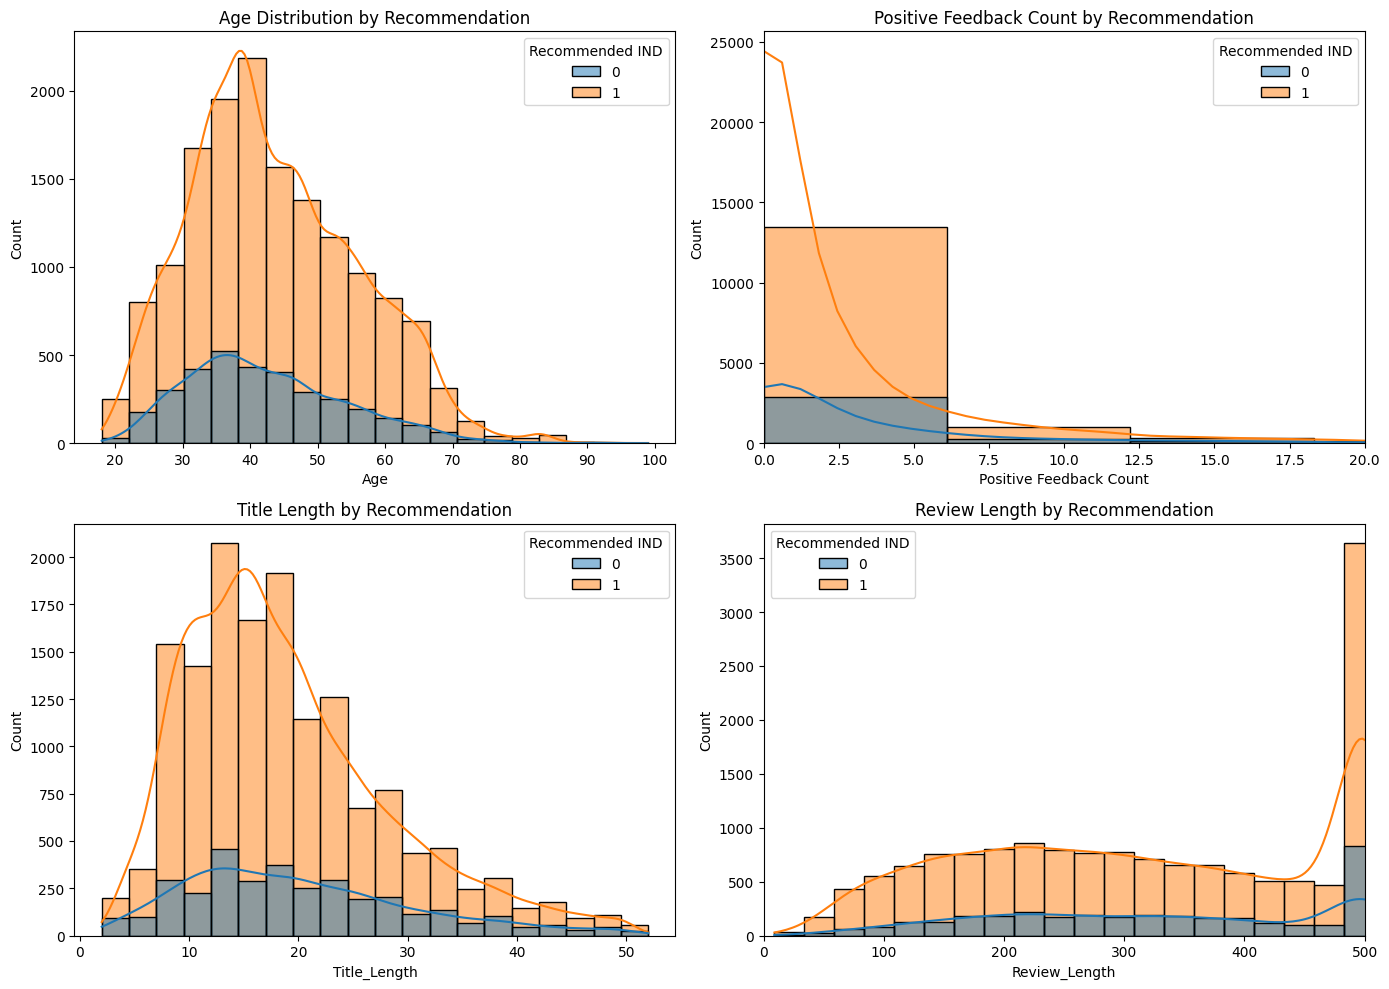

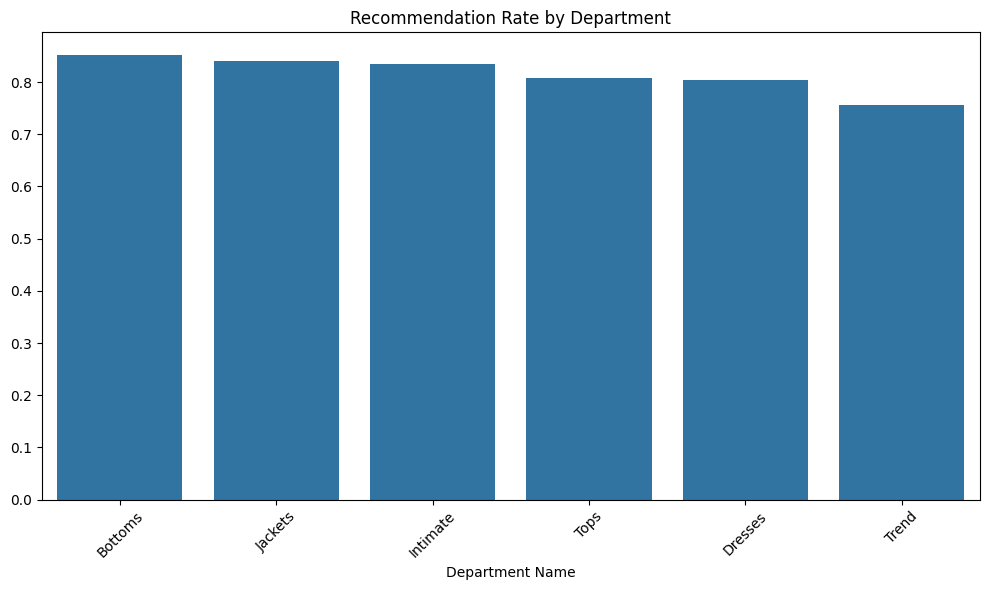

In [8]:
# Check basic statistics and distributions
print("Dataset shape:", df.shape)
print("\nTarget distribution:")
print(df['Recommended IND'].value_counts(normalize=True))

# Check the unique values in categorical columns
print("\nNumber of unique Clothing IDs:", df['Clothing ID'].nunique())
print("Number of unique Division Names:", df['Division Name'].nunique())
print("Unique Division Names:", df['Division Name'].unique())
print("Number of unique Department Names:", df['Department Name'].nunique())
print("Unique Department Names:", df['Department Name'].unique())
print("Number of unique Class Names:", df['Class Name'].nunique())

# Explore numerical features
print("\nAge statistics:")
print(df['Age'].describe())
print("\nPositive Feedback Count statistics:")
print(df['Positive Feedback Count'].describe())

# Text length exploration
df['Title_Length'] = df['Title'].apply(len)
df['Review_Length'] = df['Review Text'].apply(len)
print("\nTitle length statistics:")
print(df['Title_Length'].describe())
print("\nReview length statistics:")
print(df['Review_Length'].describe())

# Visualize the distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', hue='Recommended IND', bins=20, kde=True)
plt.title('Age Distribution by Recommendation')

# Positive Feedback distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Positive Feedback Count', hue='Recommended IND', bins=20, kde=True)
plt.title('Positive Feedback Count by Recommendation')
plt.xlim(0, 20)  # Limiting x-axis to see the distribution better

# Text length distributions
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Title_Length', hue='Recommended IND', bins=20, kde=True)
plt.title('Title Length by Recommendation')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Review_Length', hue='Recommended IND', bins=20, kde=True)
plt.title('Review Length by Recommendation')
plt.xlim(0, 500)  # Limiting x-axis to see the distribution better

plt.tight_layout()
plt.show()

# Department-wise recommendation rate
plt.figure(figsize=(10, 6))
dept_rec_rate = df.groupby('Department Name')['Recommended IND'].mean().sort_values(ascending=False)
sns.barplot(x=dept_rec_rate.index, y=dept_rec_rate.values)
plt.title('Recommendation Rate by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop the temporary columns we created for exploration
df.drop(['Title_Length', 'Review_Length'], axis=1, inplace=True)

## Feature Engineering

In [3]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 53.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


NLTK not available: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/home/codespace/nltk_data'
    - '/home/codespace/.python/current/nltk_data'
    - '/home/codespace/.python/current/share/nltk_data'
    - '/home/codespace/.python/current/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Using simplified text processing instead...
Creating additional NLP features...
Adding sentiment features...
Adding text length features...
Adding linguistic features...
NLTK not available, skipping POS features...
Adding text quality features...
F

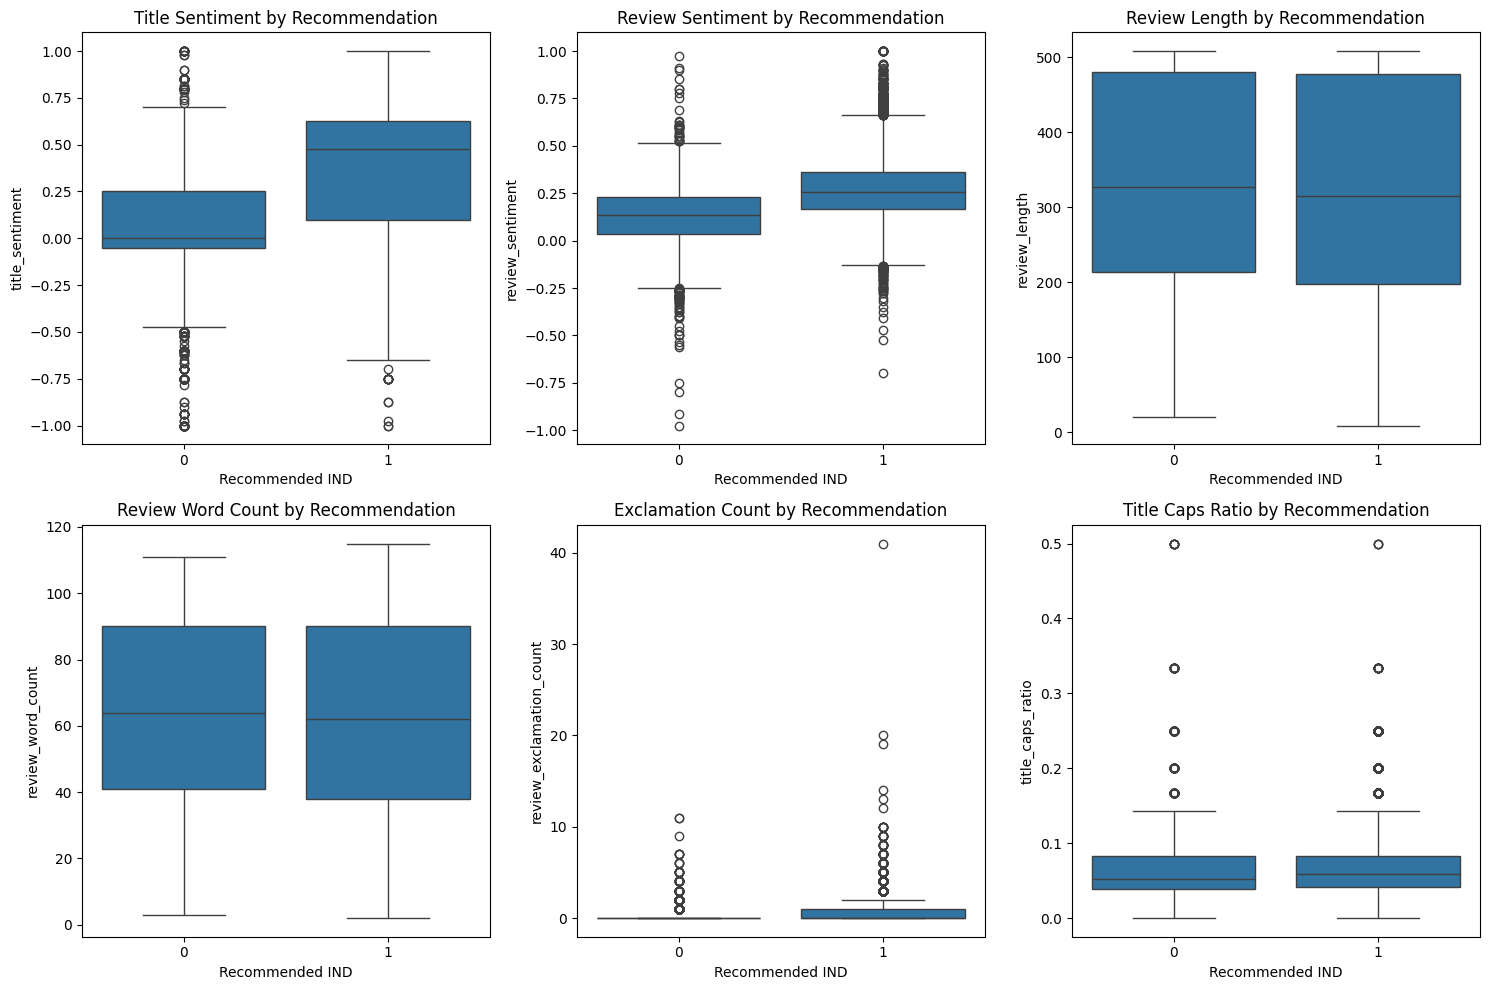


Correlation of new features with recommendation:
Recommended IND             1.000000
title_sentiment             0.379926
review_sentiment            0.316988
title_subjectivity          0.189370
review_exclamation_count    0.132958
title_exclamation_count     0.121982
review_subjectivity         0.105914
title_avg_word_length       0.042591
review_caps_ratio           0.041611
review_sentence_count       0.026735
review_avg_word_length      0.013548
title_caps_ratio           -0.002407
review_word_count          -0.022740
review_length              -0.025237
review_question_count      -0.029160
title_length               -0.054512
title_word_count           -0.085878
review_noun_ratio                NaN
review_verb_ratio                NaN
review_adj_ratio                 NaN
Name: Recommended IND, dtype: float64


In [10]:
## Feature Engineering (Fixed Version)

import numpy as np
import re

# Try to import and download NLTK data properly
try:
    import nltk
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.tag import pos_tag
    from nltk.corpus import stopwords
    
    # Download NLTK data more explicitly
    print("Downloading NLTK data...")
    nltk.download('punkt', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('vader_lexicon', quiet=True)
    
    # Test if punkt is working
    test_sent = sent_tokenize("This is a test. Does it work?")
    print("NLTK successfully loaded!")
    NLTK_AVAILABLE = True
    
except Exception as e:
    print(f"NLTK not available: {e}")
    print("Using simplified text processing instead...")
    NLTK_AVAILABLE = False

from textblob import TextBlob

def add_sentiment_features(df):
    """Add sentiment analysis features using TextBlob"""
    print("Adding sentiment features...")
    df['title_sentiment'] = df['Title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['review_sentiment'] = df['Review Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['title_subjectivity'] = df['Title'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    df['review_subjectivity'] = df['Review Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    return df

def add_text_length_features(df):
    """Add text length and count features"""
    print("Adding text length features...")
    df['title_length'] = df['Title'].apply(len)
    df['review_length'] = df['Review Text'].apply(len)
    df['title_word_count'] = df['Title'].apply(lambda x: len(str(x).split()))
    df['review_word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
    
    # Use NLTK if available, otherwise use simple regex
    if NLTK_AVAILABLE:
        df['review_sentence_count'] = df['Review Text'].apply(lambda x: len(sent_tokenize(str(x))))
    else:
        # Simple sentence counting using regex
        df['review_sentence_count'] = df['Review Text'].apply(
            lambda x: len(re.split(r'[.!?]+', str(x))) - 1 if re.split(r'[.!?]+', str(x))[-1] == '' 
            else len(re.split(r'[.!?]+', str(x)))
        )
    
    return df

def add_linguistic_features(df):
    """Add part-of-speech and linguistic features"""
    print("Adding linguistic features...")
    
    if not NLTK_AVAILABLE:
        print("NLTK not available, skipping POS features...")
        # Add dummy columns with zeros
        df['review_noun_ratio'] = 0
        df['review_verb_ratio'] = 0
        df['review_adj_ratio'] = 0
        df['review_adv_ratio'] = 0
        return df
    
    def get_pos_features(text):
        """Extract part-of-speech features from text"""
        try:
            words = word_tokenize(str(text).lower())
            pos_tags = pos_tag(words)
            
            # Count different POS categories
            noun_count = len([word for word, pos in pos_tags if pos.startswith('NN')])
            verb_count = len([word for word, pos in pos_tags if pos.startswith('VB')])
            adj_count = len([word for word, pos in pos_tags if pos.startswith('JJ')])
            adv_count = len([word for word, pos in pos_tags if pos.startswith('RB')])
            
            total_words = len(words)
            if total_words == 0:
                return 0, 0, 0, 0
                
            return (noun_count/total_words, verb_count/total_words, 
                   adj_count/total_words, adv_count/total_words)
        except:
            return 0, 0, 0, 0
    
    # Apply POS features to review text (only process first 1000 rows to speed up)
    print("Processing POS tags (this may take a moment)...")
    pos_features = df['Review Text'].head(1000).apply(get_pos_features)
    
    # Initialize all rows with 0
    df['review_noun_ratio'] = 0
    df['review_verb_ratio'] = 0
    df['review_adj_ratio'] = 0
    df['review_adv_ratio'] = 0
    
    # Fill in the first 1000 rows
    df.loc[:999, 'review_noun_ratio'] = [x[0] for x in pos_features]
    df.loc[:999, 'review_verb_ratio'] = [x[1] for x in pos_features]
    df.loc[:999, 'review_adj_ratio'] = [x[2] for x in pos_features]
    df.loc[:999, 'review_adv_ratio'] = [x[3] for x in pos_features]
    
    return df

def add_text_quality_features(df):
    """Add features that measure text quality and style"""
    print("Adding text quality features...")
    
    # Exclamation and question marks (indicators of emotion/engagement)
    df['title_exclamation_count'] = df['Title'].apply(lambda x: str(x).count('!'))
    df['review_exclamation_count'] = df['Review Text'].apply(lambda x: str(x).count('!'))
    df['review_question_count'] = df['Review Text'].apply(lambda x: str(x).count('?'))
    
    # Capital letters ratio (could indicate shouting/emphasis)
    df['title_caps_ratio'] = df['Title'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / max(len(str(x)), 1))
    df['review_caps_ratio'] = df['Review Text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / max(len(str(x)), 1))
    
    # Average word length
    df['title_avg_word_length'] = df['Title'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0)
    df['review_avg_word_length'] = df['Review Text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0)
    
    return df

# Store original column count
original_column_count = df.shape[1]

# Apply all feature engineering functions
print("Creating additional NLP features...")
df = add_sentiment_features(df.copy())
df = add_text_length_features(df)
df = add_linguistic_features(df)
df = add_text_quality_features(df)

print("Feature engineering completed!")
print(f"Dataset now has {df.shape[1]} columns (added {df.shape[1] - original_column_count} new features)")

# Display the new features
original_features = ['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 
                    'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']
new_features = [col for col in df.columns if col not in original_features]
print(f"\nNew features created: {new_features}")

# Quick analysis of sentiment features
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Recommended IND', y='title_sentiment')
plt.title('Title Sentiment by Recommendation')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Recommended IND', y='review_sentiment')
plt.title('Review Sentiment by Recommendation')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Recommended IND', y='review_length')
plt.title('Review Length by Recommendation')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Recommended IND', y='review_word_count')
plt.title('Review Word Count by Recommendation')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Recommended IND', y='review_exclamation_count')
plt.title('Exclamation Count by Recommendation')

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='Recommended IND', y='title_caps_ratio')
plt.title('Title Caps Ratio by Recommendation')

plt.tight_layout()
plt.show()

# Correlation analysis of new features with target
print("\nCorrelation of new features with recommendation:")
correlation_with_target = df[new_features + ['Recommended IND']].corr()['Recommended IND'].sort_values(ascending=False)
print(correlation_with_target[:-1])  # Exclude the target itself

## Building Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Define our feature groups
numerical_features = ['Age', 'Positive Feedback Count']
categorical_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']
text_features = ['Title', 'Review Text']

# Preprocessor for each type
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer_title = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english', min_df=5))
])

text_transformer_review = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(max_features=3000, stop_words='english', min_df=5))
])

# Column transformer that processes all feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('text_title', text_transformer_title, 'Title'),
        ('text_review', text_transformer_review, 'Review Text')
    ]
)

# Create the full pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=27, n_estimators=100))
])

## Training Pipeline

Training Accuracy: 1.0
Training ROC AUC: 1.0

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3062
           1       1.00      1.00      1.00     13535

    accuracy                           1.00     16597
   macro avg       1.00      1.00      1.00     16597
weighted avg       1.00      1.00      1.00     16597


Test Accuracy: 0.8639566395663957
Test ROC AUC: 0.9198849282614739

Test Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.35      0.48       327
           1       0.88      0.97      0.92      1518

    accuracy                           0.86      1845
   macro avg       0.81      0.66      0.70      1845
weighted avg       0.85      0.86      0.84      1845



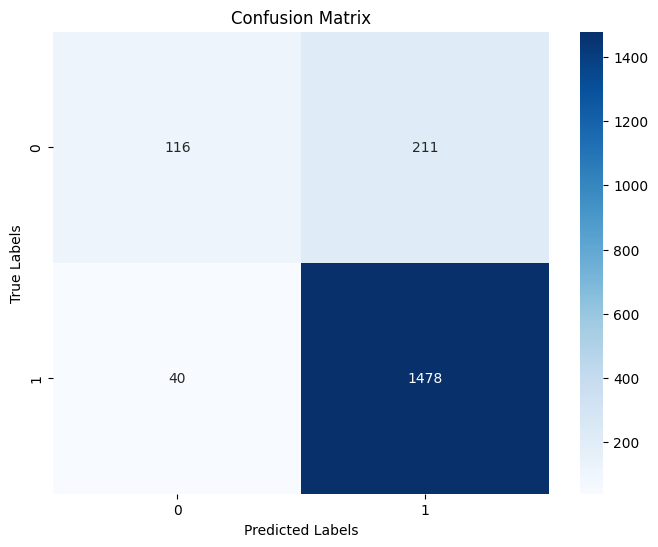

In [6]:
# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = model_pipeline.predict(X_train)
y_train_prob = model_pipeline.predict_proba(X_train)[:, 1]

# Evaluate on training data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training ROC AUC:", roc_auc_score(y_train, y_train_prob))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

# Make predictions on test data
y_test_pred = model_pipeline.predict(X_test)
y_test_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Evaluate on test data
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

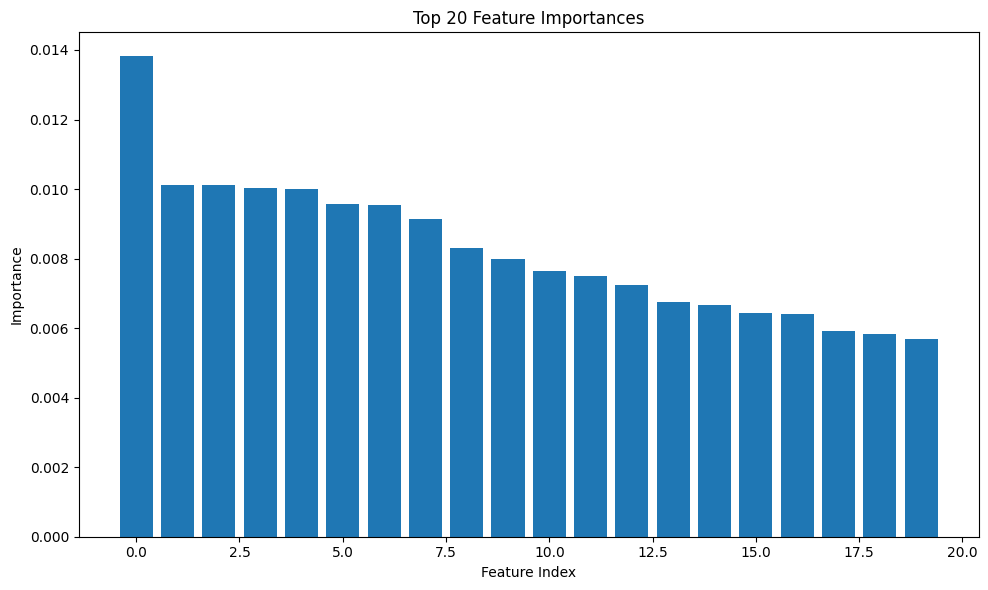

Top 20 most important features:
                      Feature  Importance
2113             disappointed    0.013816
1823                    cheap    0.010126
4145                   wanted    0.010113
3414                 returned    0.010020
2860                     love    0.010006
4074            unfortunately    0.009577
3415                returning    0.009545
2843                   looked    0.009132
4071             unflattering    0.008294
2634                     huge    0.008000
1013                     poor    0.007629
4168                      way    0.007494
3413                   return    0.007245
0                         Age    0.006746
2512                    great    0.006654
701              disappointed    0.006447
3161                  perfect    0.006402
1247                   wanted    0.005910
2814                     like    0.005837
1     Positive Feedback Count    0.005673


In [7]:
# Extract feature names from our pipeline
def get_feature_names(column_transformer):
    feature_names = []
    
    # Get feature names for each transformer
    for name, pipe, features in column_transformer.transformers_:
        if name == 'num':
            feature_names.extend(features)
        elif name == 'cat':
            # Get one-hot encoded feature names
            feature_names.extend(pipe.named_steps['onehot'].get_feature_names_out(features))
        elif name.startswith('text'):
            # Get tfidf feature names
            if hasattr(pipe.named_steps['tfidf'], 'get_feature_names_out'):
                feature_names.extend(pipe.named_steps['tfidf'].get_feature_names_out())
            else:
                feature_names.extend([f"{name}_{i}" for i in range(pipe.named_steps['tfidf'].max_features)])
    
    return feature_names

# Get feature importances from the Random Forest model
# Note: This is a simplification as we can't easily extract feature names from TF-IDF
# Get feature importances from our classifier
importances = model_pipeline.named_steps['classifier'].feature_importances_

# Display top 20 most important features
plt.figure(figsize=(10, 6))
plt.bar(range(20), sorted(importances, reverse=True)[:20])
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Create a DataFrame of feature importances
try:
    feature_names = get_feature_names(model_pipeline.named_steps['preprocessor'])
    if len(feature_names) == len(importances):
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        print("Top 20 most important features:")
        print(importance_df.head(20))
except:
    print("Could not extract feature names, showing importances by index only.")

## Fine-Tuning Pipeline

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'preprocessor__text_review__tfidf__max_features': [1000, 3000],
}

# Create GridSearchCV
grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Run grid search
print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found:")
print(grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

Starting grid search...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:
{'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'preprocessor__text_review__tfidf__max_features': 3000}
Best CV score: 0.925144562222865


# Evaluating Final Model

Final Model Test Accuracy: 0.867750677506775
Final Model ROC AUC: 0.9226055932278507

Final Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.37      0.50       327
           1       0.88      0.97      0.92      1518

    accuracy                           0.87      1845
   macro avg       0.82      0.67      0.71      1845
weighted avg       0.86      0.87      0.85      1845



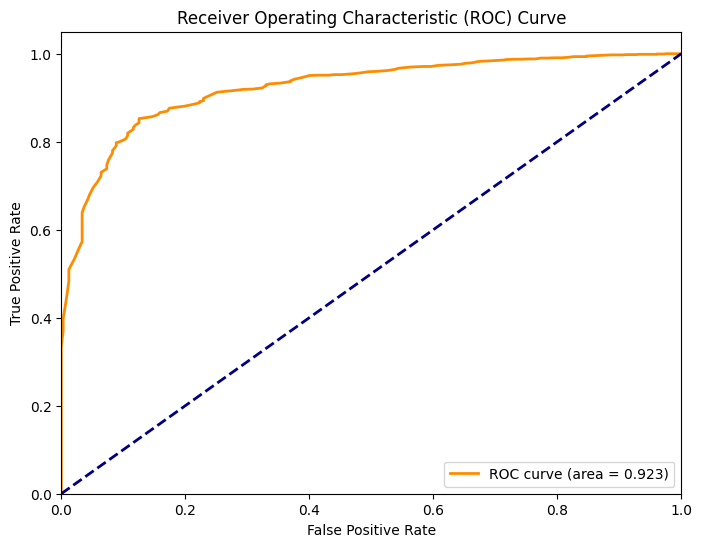

In [10]:
# Make predictions with best model
y_test_pred_tuned = best_model.predict(X_test)
y_test_prob_tuned = best_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Final Model Test Accuracy:", accuracy_score(y_test, y_test_pred_tuned))
print("Final Model ROC AUC:", roc_auc_score(y_test, y_test_prob_tuned))
print("\nFinal Model Test Classification Report:")
print(classification_report(y_test, y_test_pred_tuned))

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob_tuned)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# Model Interpretability

In [11]:
# Try to extract and analyze TF-IDF coefficients
try:
    # Get TF-IDF vectorizer for reviews
    tfidf = best_model.named_steps['preprocessor'].transformers_[3][1].named_steps['tfidf']
    
    # Get top words by TF-IDF
    feature_names = tfidf.get_feature_names_out()
    
    # Example: Print top 20 words with highest TF-IDF across the dataset
    X_tfidf = tfidf.transform(X_train['Review Text'])
    tfidf_sum = X_tfidf.sum(axis=0).A1
    
    word_freq = [(word, tfidf_sum[idx]) for idx, word in enumerate(feature_names)]
    word_freq.sort(key=lambda x: x[1], reverse=True)
    
    print("Top 20 words by TF-IDF frequency:")
    for word, freq in word_freq[:20]:
        print(f"{word}: {freq:.2f}")
        
    # Analyze words in positive vs negative recommendations
    pos_indices = y_train == 1
    neg_indices = y_train == 0
    
    X_tfidf_pos = tfidf.transform(X_train.loc[pos_indices, 'Review Text'])
    X_tfidf_neg = tfidf.transform(X_train.loc[neg_indices, 'Review Text'])
    
    tfidf_sum_pos = X_tfidf_pos.sum(axis=0).A1 / pos_indices.sum()
    tfidf_sum_neg = X_tfidf_neg.sum(axis=0).A1 / neg_indices.sum()
    
    # Calculate the difference to find "discriminative" words
    word_diff = [(word, tfidf_sum_pos[idx] - tfidf_sum_neg[idx]) 
                for idx, word in enumerate(feature_names)]
    
    # Top words associated with positive recommendations
    word_diff.sort(key=lambda x: x[1], reverse=True)
    print("\nTop 15 words associated with POSITIVE recommendations:")
    for word, diff in word_diff[:15]:
        print(f"{word}: {diff:.4f}")
    
    # Top words associated with negative recommendations
    word_diff.sort(key=lambda x: x[1])
    print("\nTop 15 words associated with NEGATIVE recommendations:")
    for word, diff in word_diff[:15]:
        print(f"{word}: {diff:.4f}")
    
except:
    print("Could not extract TF-IDF features for analysis.")

Top 20 words by TF-IDF frequency:
dress: 771.93
love: 634.09
size: 592.19
fit: 522.90
great: 521.28
like: 493.38
wear: 474.69
just: 427.97
color: 397.30
fabric: 394.93
small: 390.44
perfect: 356.82
really: 343.77
look: 342.68
flattering: 340.19
little: 337.05
ordered: 327.15
comfortable: 322.90
shirt: 318.47
cute: 315.81

Top 15 words associated with POSITIVE recommendations:
great: 0.0225
love: 0.0221
perfect: 0.0195
comfortable: 0.0174
fits: 0.0149
wear: 0.0142
jeans: 0.0138
soft: 0.0128
size: 0.0124
little: 0.0121
bought: 0.0102
compliments: 0.0097
perfectly: 0.0095
true: 0.0089
summer: 0.0083

Top 15 words associated with NEGATIVE recommendations:
looked: -0.0170
disappointed: -0.0155
wanted: -0.0154
way: -0.0149
like: -0.0142
unfortunately: -0.0134
huge: -0.0131
fabric: -0.0129
returned: -0.0129
return: -0.0126
returning: -0.0123
cheap: -0.0115
unflattering: -0.0110
didn: -0.0109
material: -0.0099


## Creating a Function to Make Predictions on New Data

In [15]:
def predict_recommendation(title, review_text, age, pos_feedback_count, 
                           clothing_id, division_name, department_name, class_name,
                           model=best_model):
    """
    Make a prediction for a single customer review
    """
    # Create a dataframe with the new data
    new_data = pd.DataFrame({
        'Clothing ID': [clothing_id],
        'Age': [age],
        'Title': [title],
        'Review Text': [review_text],
        'Positive Feedback Count': [pos_feedback_count],
        'Division Name': [division_name],
        'Department Name': [department_name],
        'Class Name': [class_name]
    })
    
    # Make prediction
    prediction = model.predict(new_data)[0]
    probability = model.predict_proba(new_data)[0, 1]
    
    return {
        'recommended': bool(prediction),
        'probability': probability,
        'recommendation_text': "Recommended" if prediction == 1 else "Not Recommended"
    }

## Testing the Function with Examples


In [14]:
# Test with an example from our dataset
example = X_test.iloc[0]
actual_label = y_test.iloc[0]

result = predict_recommendation(
    title=example['Title'],
    review_text=example['Review Text'],
    age=example['Age'],
    pos_feedback_count=example['Positive Feedback Count'],
    clothing_id=example['Clothing ID'],
    division_name=example['Division Name'],
    department_name=example['Department Name'],
    class_name=example['Class Name']
)

print(f"Example product review:\nTitle: {example['Title']}\nExcerpt: {example['Review Text'][:100]}...\n")
print(f"Prediction: {result['recommendation_text']}")
print(f"Confidence: {result['probability']:.2f}")
print(f"Actual: {'Recommended' if actual_label == 1 else 'Not Recommended'}")

Example product review:
Title: Trendy simplicity
Excerpt: This shirt is a great way to rock the off the shoulder trend. you can dress it up or down bi would d...

Prediction: Recommended
Confidence: 0.88
Actual: Recommended
